<a href="https://colab.research.google.com/github/huynhspm/Machine_Learning/blob/main/Neural%20Network/Gender_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# dowload data from kaggle
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserhessein/gender-dataset")
# {"username":"trinhngochuynh","key":"e133854640c80433b1e42d856ce6cafe"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: trinhngochuynh
Your Kaggle Key: ··········


100%|██████████| 1.32G/1.32G [00:10<00:00, 135MB/s]


In [ ]:
# 1. import lib
import numpy as np 
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from keras.layers import Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import time

In [ ]:
# 2. Load data
train_dir = "/content/gender-dataset/Dataset/Train/"
val_dir = "/content/gender-dataset/Dataset/Validation/"
test_dir = "/content/gender-dataset/Dataset/Test/"

CATEGORIES = ["FeMale", "Male"]

img_width = 64
img_height = 64
img_channel = 3

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(val_dir, target_size=(img_width, img_height), 
                                                     subset='training', batch_size=64, class_mode='categorical')
val_generator = data_generator.flow_from_directory(val_dir, target_size=(img_width, img_height), 
                                                   subset='validation', batch_size=64, class_mode='categorical')
test_generator = data_generator.flow_from_directory(test_dir, target_size=(img_width, img_height), 
                                                    batch_size=64, class_mode='categorical')

Found 18079 images belonging to 2 classes.
Found 4519 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


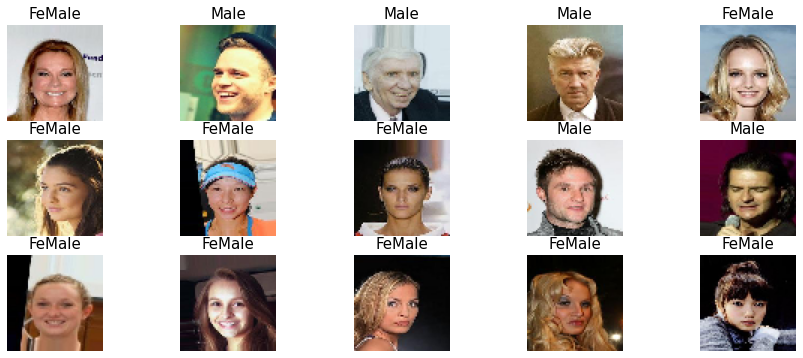

In [ ]:
# 3. Show image
img, label = val_generator.next()
label = np.argmax(label, 1)
rows = 3
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(rows*cols):
    axes[i].imshow(img[i])
    axes[i].axis('off')
    axes[i].set_title(CATEGORIES[label[i]], fontsize=15)

In [ ]:
# 4. Build model
model = Sequential()

model.add(Flatten(input_shape=(img_width, img_height, img_channel)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              12583936  
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12,715,394
Trainable params: 12,715,394
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5. Train model
start_time = time.time()

numOfEpoch = 10
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2,
                                            verbose = 1,factor = 0.5,min_lr = 0.00001)
model_checkpoint = ModelCheckpoint(filepath='../input/model.h5', monitor='val_acc', mode='max', save_best_only=True)

H =  model.fit(train_generator, epochs = numOfEpoch, validation_data = val_generator, 
               verbose=1, callbacks=[earlystop, learning_rate_reduction, model_checkpoint])

end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/10
283/283 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.7634

283/283 [==============================] - 23s 77ms/step - loss: 0.6598 - accuracy: 0.7634 - val_loss: 0.3544 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 2/10
283/283 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.8499

283/283 [==============================] - 21s 75ms/step - loss: 0.3590 - accuracy: 0.8499 - val_loss: 0.2635 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 3/10
283/283 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.8752

283/283 [==============================] - 20s 72ms/step - loss: 0.3036 - accuracy: 0.8752 - val_loss: 0.2776 - val_accuracy: 0.8836 - lr: 0.0010
Epoch 4/10
283/283 [==============================] - ETA: 0s - loss: 0.2578 - accuracy: 0.8914

283/283 [==============================] - 20s 72ms/step - loss: 0.2578 - accuracy: 0.8914 - val_loss: 0.2403 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 5/10
283/283 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.9016

283/283 [==============================] - 20s 71ms/step - loss: 0.2414 - accuracy: 0.9016 - val_loss: 0.2029 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 6/10
283/283 [==============================] - ETA: 0s - loss: 0.2428 - accuracy: 0.9012

283/283 [==============================] - 20s 72ms/step - loss: 0.2428 - accuracy: 0.9012 - val_loss: 0.2392 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 7/10
283/283 [==============================] - ETA: 0s - loss: 0.2166 - accuracy: 0.9132
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


283/283 [==============================] - 20s 72ms/step - loss: 0.2166 - accuracy: 0.9132 - val_loss: 0.2068 - val_accuracy: 0.9186 - lr: 0.0010
Epoch 8/10
283/283 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 0.9314

283/283 [==============================] - 21s 72ms/step - loss: 0.1698 - accuracy: 0.9314 - val_loss: 0.1940 - val_accuracy: 0.9254 - lr: 5.0000e-04
Epoch 9/10
283/283 [==============================] - ETA: 0s - loss: 0.1585 - accuracy: 0.9363

283/283 [==============================] - 20s 72ms/step - loss: 0.1585 - accuracy: 0.9363 - val_loss: 0.1908 - val_accuracy: 0.9239 - lr: 5.0000e-04
Epoch 10/10
283/283 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9357

283/283 [==============================] - 20s 72ms/step - loss: 0.1608 - accuracy: 0.9357 - val_loss: 0.1821 - val_accuracy: 0.9305 - lr: 5.0000e-04
Running time: 206.69 (s)


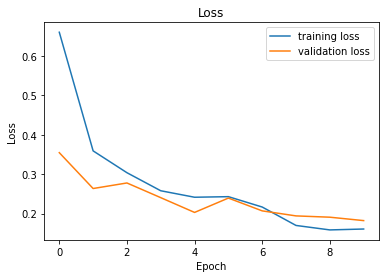

In [ ]:
# 6. plot loss function of traning set and validation set
plt.plot(np.arange(0, len(H.epoch)), H.history['loss'], label='training loss')
plt.plot(np.arange(0, len(H.epoch)), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

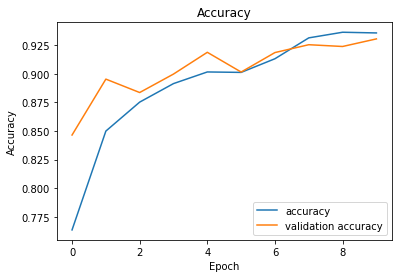

In [ ]:
# 7. plot accuracy of traning set and validation set
plt.plot(np.arange(0, len(H.epoch)), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, len(H.epoch)), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 8. evaluate model with test_set
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(test_generator, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 18s 58ms/step - loss: 0.1784 - accuracy: 0.9315
[loss, accuracy]:  [0.17843298614025116, 0.9314534068107605]
Running time: 18.29 (s)


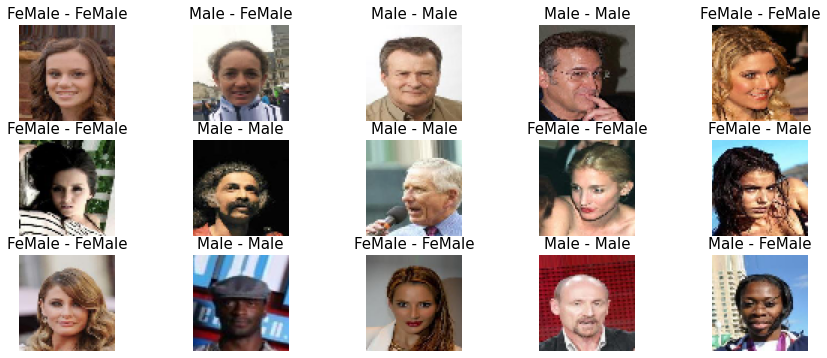

In [ ]:
# 9. Show predict on test_set
img, label = test_generator.next()
label = np.argmax(label, 1)
rows = 3
cols = 5

pred = model.predict(img[0: rows * cols])
pred = np.argmax(pred, 1)

fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(rows*cols):
    axes[i].imshow(img[i])
    axes[i].axis('off')
    axes[i].set_title(CATEGORIES[pred[i]] + ' - ' + CATEGORIES[label[i]], fontsize=15)